# Prediction using Decision Tree Algorithm
Author: Rohan Khanna

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data). In Decision Trees, for predicting a class label for a record we start from the root of the tree.

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df= pd.read_csv('Iris.csv') #we use a csv file here to work with.

In [3]:
df.head() # it is used to view the first five row of the dataset iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df_1=pd.get_dummies(df.Species) # it is used to convert the categorical data into numerical value
df_1

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [5]:
data=pd.concat([df,df_1],axis=1) # use to add/merge those dummy columns to the main dataset
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0,0,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0,0,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0,0,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0,0,1


In [6]:
data.drop(['Species'],axis='columns',inplace=True)

In [7]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,0.333333,0.333333,0.333333
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.472984,0.472984,0.472984
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [9]:
data.isnull().sum() # it is used to check the null values in the system 

Id                 0
SepalLengthCm      0
SepalWidthCm       0
PetalLengthCm      0
PetalWidthCm       0
Iris-setosa        0
Iris-versicolor    0
Iris-virginica     0
dtype: int64

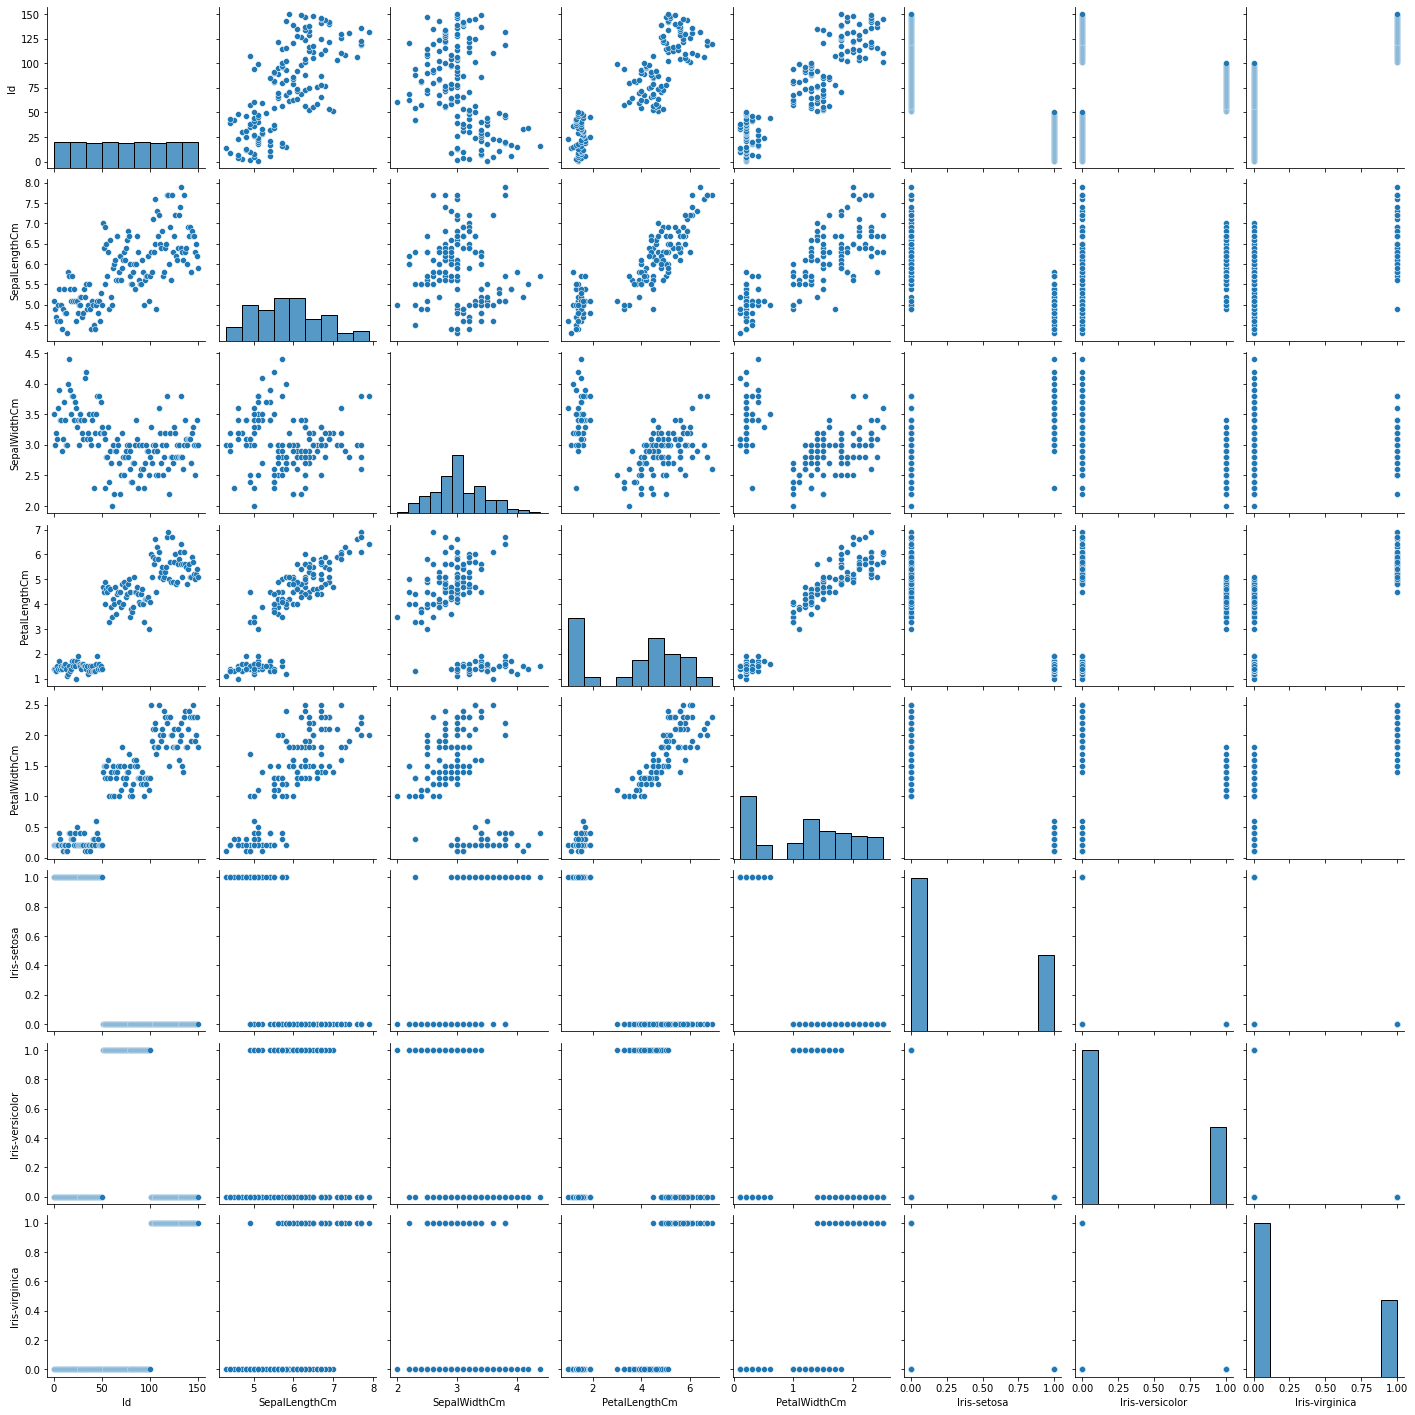

In [10]:
sns.pairplot(data)

# Model fitting

In [11]:
from sklearn.model_selection import train_test_split # using this we will split the data in training and test dataset

In [12]:
x=data.drop(['Iris-setosa','Iris-versicolor','Iris-virginica'],axis=1) # Independent variable

In [13]:
y=data[['Iris-setosa','Iris-versicolor','Iris-virginica']] # target or dependent variable

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) # We use 20% data for testing and remaining for training
x_train.shape

(120, 5)

In [15]:
x_test.shape

(30, 5)

In [16]:
from sklearn.tree import DecisionTreeClassifier # import the Decision tree Classifier 

In [17]:
model=DecisionTreeClassifier()

In [18]:
model.fit(x_train,y_train) # here we train our model and make it ready to make prediction

DecisionTreeClassifier()

In [19]:
pred=model.predict(x_test)
pred

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]], dtype=uint8)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
Accuracy= accuracy_score(y_test,pred) # To check the accuracy of the Model on the test data.
Accuracy

1.0

In [22]:
from sklearn import tree

[Text(334.8, 453.0, 'PetalLengthCm <= 2.45\ngini = 0.444\nsamples = 120\nvalue = [[79, 41]\n[81, 39]\n[80, 40]]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 41\nvalue = [[0, 41]\n[41, 0]\n[41, 0]]'),
 Text(502.20000000000005, 271.8, 'Id <= 100.5\ngini = 0.333\nsamples = 79\nvalue = [[79, 0]\n[40, 39]\n[39, 40]]'),
 Text(334.8, 90.59999999999997, 'gini = 0.0\nsamples = 39\nvalue = [[39, 0]\n[0, 39]\n[39, 0]]'),
 Text(669.6, 90.59999999999997, 'gini = 0.0\nsamples = 40\nvalue = [[40, 0]\n[40, 0]\n[0, 40]]')]

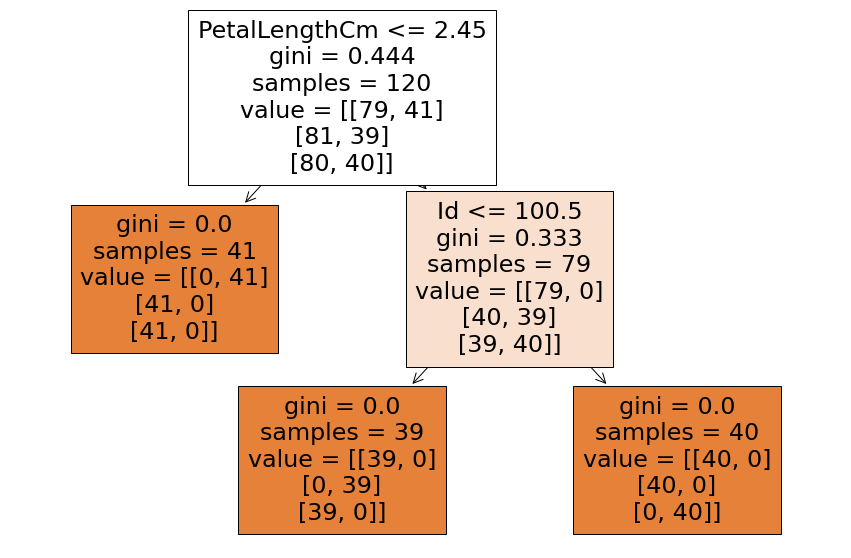

In [23]:
# to graphically visualize the decision tree
plt.figure(figsize=(15,10))
feature=['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm' ,'PetalWidthCm']
category=['Iris-setosa','Iris-versicolor','Iris-virginica']
tree.plot_tree(model,
              feature_names=feature,
              class_names=category,
              filled=True)